<a href="https://colab.research.google.com/github/MosaddikHabib/machine-Learning/blob/main/Face_Expression_Model_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from skimage import feature
import xgboost as xgb
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input, concatenate
from keras.callbacks import ModelCheckpoint

In [ ]:
zip_path = '/content/drive/My Drive/xgboost/archive.zip'
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
TRAIN_DIR = "/content/images/train"
TEST_DIR = "/content/images/validation"

In [ ]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
neutral completed
surprise completed
disgust completed
happy completed
sad completed
fear completed


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
neutral completed
surprise completed
disgust completed
happy completed
sad completed
fear completed


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def extract_features(images, target_size=(48, 48), grayscale=True, augment=False):
    features = []
    datagen = ImageDataGenerator(
        rescale=1./255,  # Normalize pixel values to [0, 1]
        featurewise_center=False,
        featurewise_std_normalization=False,
        rotation_range=20,  # Randomly rotate images (if augment=True)
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,  # Randomly flip images (if augment=True)
        fill_mode='nearest'
    )

    for image in tqdm(images):
        img = load_img(image, grayscale=grayscale, target_size=target_size)
        img_array = img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)

        if augment:
            # Apply data augmentation
            for batch in datagen.flow(img_array, batch_size=1):
                img_array = batch[0]
                break

        features.append(img_array)

    features = np.vstack(features)
    return features


In [ ]:
# def extract_features(images):
#     features = []
#     for image in tqdm(images):
#         img = load_img(image,grayscale =  True )
#         img = np.array(img)
#         features.append(img)
#     features = np.array(features)
#     features = features.reshape(len(features),48,48,1)
#     return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [ ]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [ ]:
# model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

In [ ]:
# prompt: put the training history in a history vaiable

history = model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))


Epoch 1/100
226/226 [==============================] - 23s 67ms/step - loss: 1.8242 - accuracy: 0.2449 - val_loss: 1.8137 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 11s 49ms/step - loss: 1.8054 - accuracy: 0.2526 - val_loss: 1.7855 - val_accuracy: 0.2588
Epoch 3/100
226/226 [==============================] - 12s 51ms/step - loss: 1.7605 - accuracy: 0.2687 - val_loss: 1.6732 - val_accuracy: 0.3220
Epoch 4/100
226/226 [==============================] - 11s 50ms/step - loss: 1.6522 - accuracy: 0.3378 - val_loss: 1.4945 - val_accuracy: 0.4205
Epoch 5/100
226/226 [==============================] - 11s 51ms/step - loss: 1.5287 - accuracy: 0.4041 - val_loss: 1.3973 - val_accuracy: 0.4699
Epoch 6/100
226/226 [==============================] - 11s 51ms/step - loss: 1.4525 - accuracy: 0.4364 - val_loss: 1.3584 - val_accuracy: 0.4843
Epoch 7/100
226/226 [==============================] - 11s 51ms/step - loss: 1.4051 - accuracy: 0.4585 - val_loss: 1.2795 - val_ac

In [ ]:
# prompt: save model

model.save('/content/drive/My Drive/xgboost/model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


221/221 [==============================] - 1s 4ms/step
Accuracy: 0.6368525332578545
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       960
           1       0.91      0.55      0.69       111
           2       0.57      0.34      0.43      1018
           3       0.79      0.85      0.82      1825
           4       0.56      0.61      0.58      1216
           5       0.48      0.56      0.52      1139
           6       0.76      0.79      0.78       797

    accuracy                           0.64      7066
   macro avg       0.66      0.61      0.62      7066
weighted avg       0.64      0.64      0.63      7066

[[ 525    0   62   75  127  146   25]
 [  18   61    9    2    7   12    2]
 [ 141    3  349   65  133  225  102]
 [  38    0   25 1558   88   85   31]
 [  83    0   39  134  737  205   18]
 [ 105    1   89   87  203  637   17]
 [  19    2   41   55   24   23  633]]


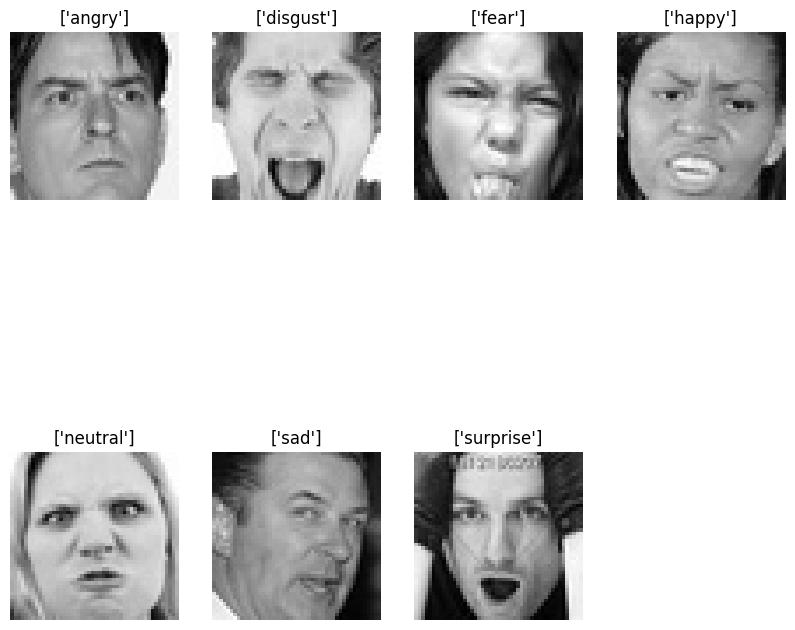

In [ ]:
# prompt: Evaluate on Test Data and plot them

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
print('Accuracy:', accuracy_score(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))
plt.figure(figsize=(10,10))
for i in range(7):
    plt.subplot(2,4,i+1)
    plt.title(le.inverse_transform([i]))
    plt.imshow(x_test[i].reshape(48,48),cmap='gray')
    plt.axis('off')
plt.show()


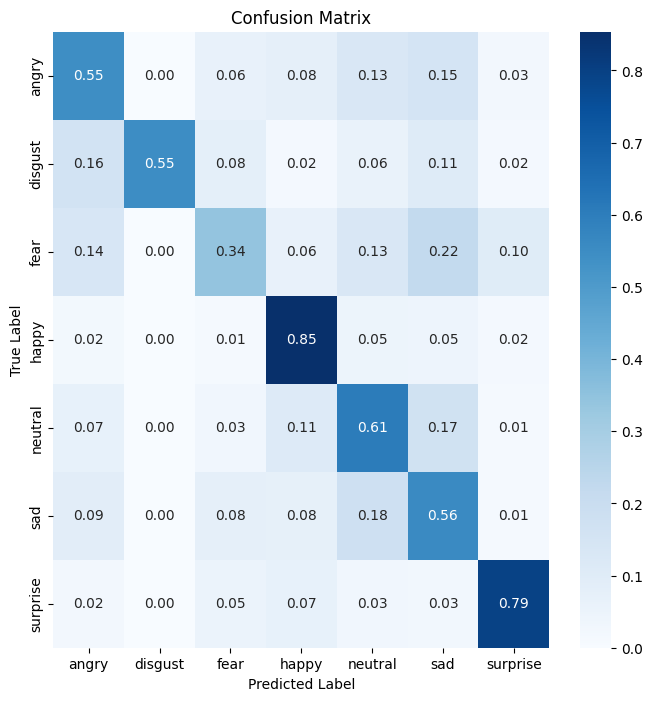

In [ ]:
# prompt: visualization of prediction

import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_norm, annot=True, cmap="Blues", fmt=".2f", xticklabels=le.inverse_transform(range(7)), yticklabels=le.inverse_transform(range(7)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


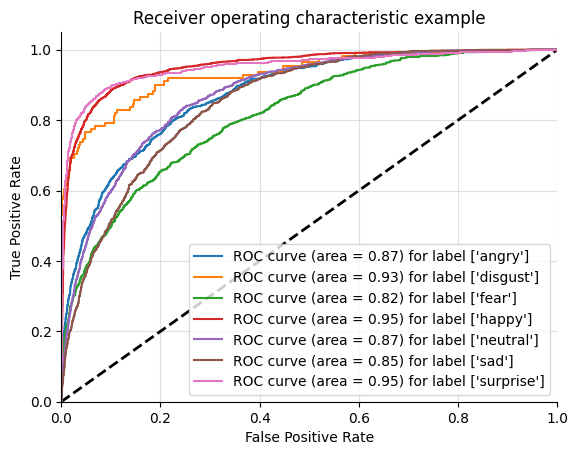

In [ ]:
# prompt: ROC curve

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 7
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, ax = plt.subplots()
lw = 2
ax.plot([0, 1], [0, 1], 'k--', lw=lw)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for label {le.inverse_transform([i])}')
ax.legend(loc="best")
ax.grid(alpha=0.4)
sns.despine()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

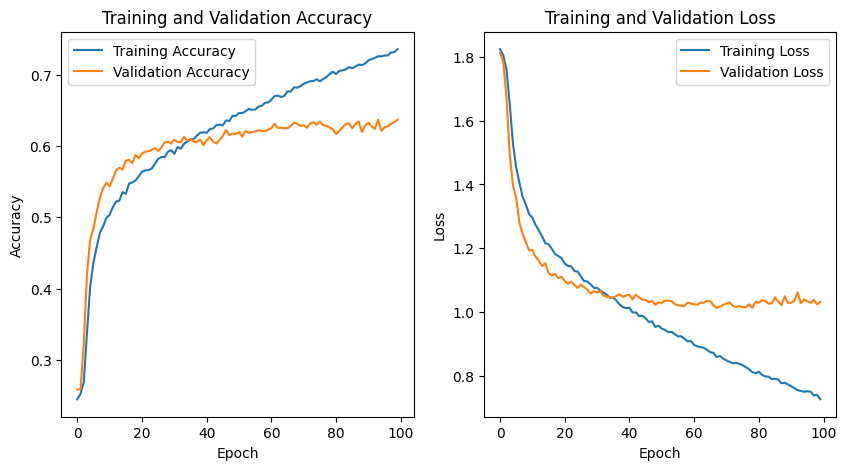

In [ ]:


# prompt: Learning Curves plot

# Calculate training and validation accuracy for each epoch
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Calculate training and validation loss for each epoch
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation accuracy for each epoch
ax1.plot(train_accuracy, label='Training Accuracy')
ax1.plot(val_accuracy, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss for each epoch
ax2.plot(train_loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot
plt.show()


221/221 [==============================] - 1s 4ms/step


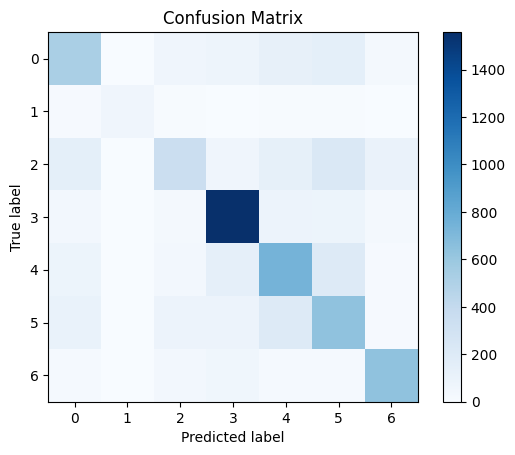

In [ ]:
# prompt: make confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Predict the labels for the test data
y_pred = model.predict(x_test)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels for the test data
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def custom_emotion_loss(y_true, y_pred):
    # Categorical cross-entropy loss
    categorical_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)

    # Mean absolute error loss
    mae_loss = tf.keras.losses.mean_absolute_error(y_true, y_pred)

    # Custom loss as a combination of both
    custom_loss = categorical_loss + mae_loss

    return custom_loss

# Compile your model using the custom loss function
model.compile(optimizer='adam', loss=custom_emotion_loss, metrics=['accuracy'])

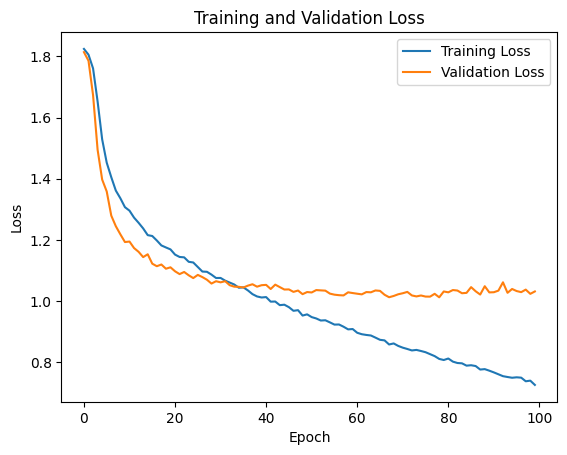

In [ ]:
# history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

# Plot the training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


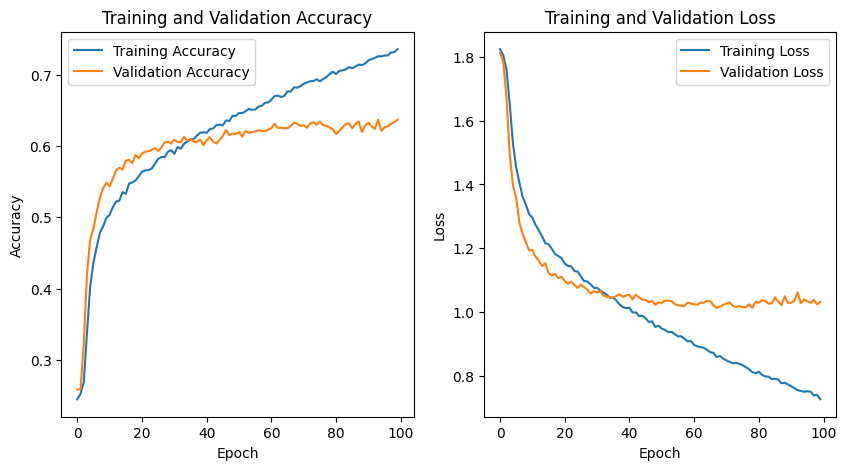

In [ ]:
# prompt: train and validation accuracy

# Calculate training and validation accuracy for each epoch
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Calculate training and validation loss for each epoch
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation accuracy for each epoch
ax1.plot(train_accuracy, label='Training Accuracy')
ax1.plot(val_accuracy, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss for each epoch
ax2.plot(train_loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot
plt.show()


In [ ]:
# prompt: save and download the model

model.save('my_model.h5')
from google.colab import files
files.download('my_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: save and download the json file

import json

# Convert the model to JSON
model_json = model.to_json()

# Save the model JSON to a file
with open('model.json', 'w') as json_file:
    json.dump(model_json, json_file)

# Download the JSON file
files.download('model.json')


In [ ]:
# prompt: name of GPU, CUDA version, cuDNN version

!nvidia-smi


Sun Mar  3 08:16:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              43W / 350W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
# prompt: cuDNN

!nvcc --version
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
cat: /usr/local/cuda/include/cudnn.h: No such file or directory


In [ ]:
# prompt: count cuda core of gpu

!nvidia-smi -q -d Memory | grep -A4 GPU


Attached GPUs                             : 1
GPU 00000000:00:04.0
    FB Memory Usage
        Total                             : 40960 MiB
        Reserved                          : 446 MiB
        Used                              : 2 MiB


221/221 [==============================] - 2s 9ms/step
Accuracy: 0.3606000566091141
              precision    recall  f1-score   support

           0       0.36      0.06      0.10       960
           1       0.00      0.00      0.00       111
           2       0.18      0.04      0.07      1018
           3       0.43      0.76      0.55      1825
           4       0.29      0.14      0.19      1216
           5       0.32      0.19      0.24      1139
           6       0.31      0.86      0.46       797

    accuracy                           0.36      7066
   macro avg       0.27      0.29      0.23      7066
weighted avg       0.32      0.36      0.29      7066

[[  53    0   47  350  108  138  264]
 [   3    0    6   47   18    9   28]
 [  27    0   43  296   71  101  480]
 [  15    0   30 1380   69   89  242]
 [  19    0   41  619  166  120  251]
 [  24    0   56  474  125  217  243]
 [   7    0   12   64   14   11  689]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


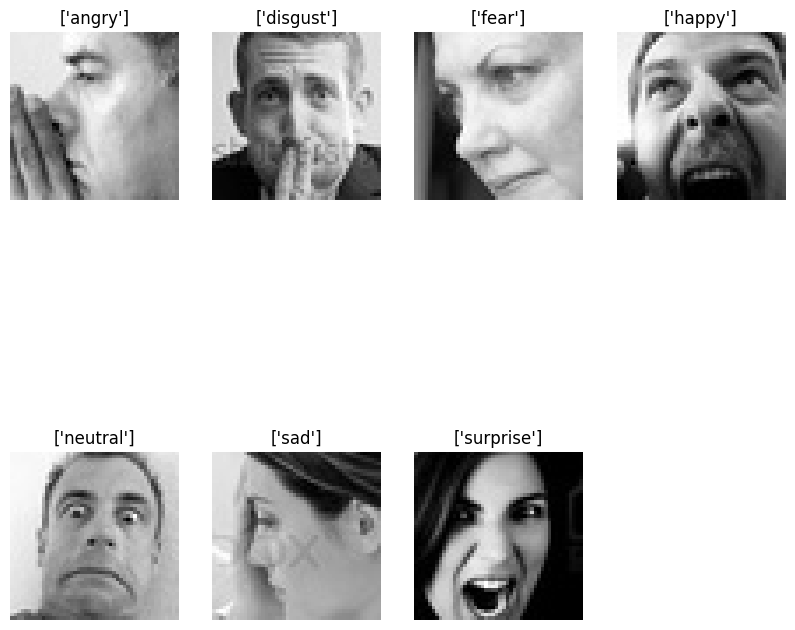

In [ ]:
# prompt: how many picture can detect correctly with the lable form validation format
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
print('Accuracy:', accuracy_score(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))
plt.figure(figsize=(10,10))
for i in range(7):
    plt.subplot(2,4,i+1)
    plt.title(le.inverse_transform([i]))
    plt.imshow(x_test[i].reshape(48,48),cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
!pip install pillow

In [ ]:
from PIL import Image as pilimg


1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


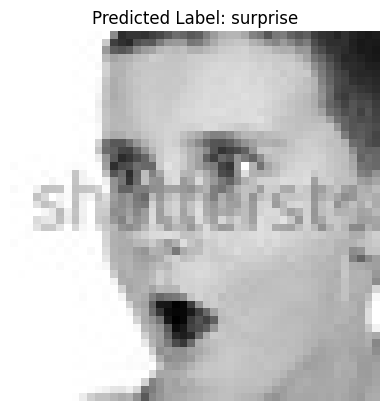

In [ ]:
# prompt: take input a angry image from dataset and detect. Plot the detected image also with label

import matplotlib.pyplot as plt

# Load the image
image_path = '/content/images/validation/surprise/10768.jpg'
# imageInput = pilimg.open("/content/images/validation/angry/10286.jpg")
image = load_img(image_path, grayscale=True, target_size=(48, 48))

# Convert the image to a numpy array
image_array = img_to_array(image)

# Normalize the image
image_array /= 255.0

# Reshape the image for the model
image_array = image_array.reshape((1,) + image_array.shape)

# Make a prediction using the model
prediction = model.predict(image_array)

# Get the predicted label
predicted_label = np.argmax(prediction)

# Get the label encoder
le = LabelEncoder()
le.fit(train['label'])

# Convert the predicted label back to a string
predicted_label_str = le.inverse_transform([predicted_label])[0]

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Predicted Label: {predicted_label_str}')
plt.axis('off')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score